In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from utils.annot_convertations import animalpose2yolo
from utils.yolo_helpers import annotations_labels, count_classes, split_yolo_dataset
import numpy as np
from utils.plot import draw_annotation
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import glob
import random
from PIL import Image 

In [3]:
SEED = 1221

In [4]:
random.seed(SEED)

Animal pose dataset was used
(I assume, this dataset was also showed in the task :b)
https://github.com/noahcao/animal-pose-dataset

In [5]:
annotation_path = os.path.join(os.getcwd(),'..', 'datasets','animal-pose','annotations','keypoints.json')
dest_path = os.path.join(os.getcwd(),'..', 'datasets','animal-pose-yolo')
category_ids = (1, 2) # 1 - dogs, 2 - cats

In [6]:
# generating yolo-style dataset with classes of dogs and cats 

animalpose2yolo(json_annot_path=annotation_path,
                dest_path=dest_path,
                cat_ids=category_ids)

Annots generation: 100%|██████████| 2820/2820 [00:05<00:00, 479.65it/s]


Text(0.5, 1.0, 'Dims')

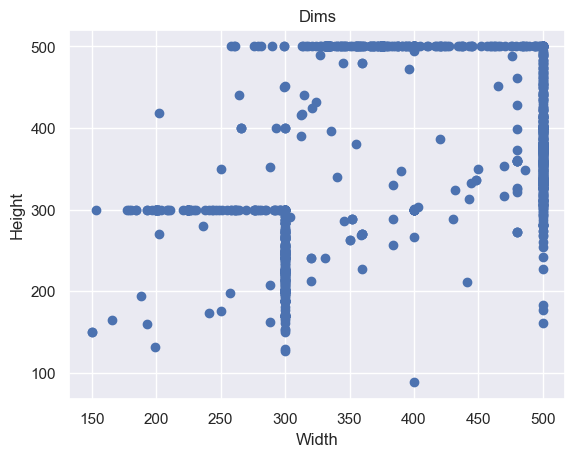

In [7]:
# image sizes review
imgs_path = os.path.join(dest_path,'images')
imgs = glob.glob(os.path.join(imgs_path,"*"))

wh = np.array([Image.open(img).size for img in imgs])

plt.scatter(wh[:,0], wh[:,1])
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Dims')

In [8]:
# count outliers 
img_size_threshold = 150
outlier_counts = np.sum(wh < img_size_threshold, axis=1)
np.sum(outlier_counts)

4

In [9]:
# remove outliers
outlier_idxs = np.argwhere(outlier_counts > 0)

for outlier_idx in outlier_idxs.reshape(-1,):
    remove_img_path = imgs[outlier_idx]
    remove_annot_path = ('.').join(remove_img_path.replace('images','labels').split('.')[:-1]) + '.txt'

    os.remove(remove_img_path)
    os.remove(remove_annot_path)

In [10]:
# per class distro review 
class_names = ('Dog', 'Cat')
annotations_path = os.path.join(dest_path,'labels')
labels = np.array(annotations_labels(annotations_path))
counts = np.unique(labels, return_counts=True)[1]

Text(0.5, 1.0, 'Class Distribution')

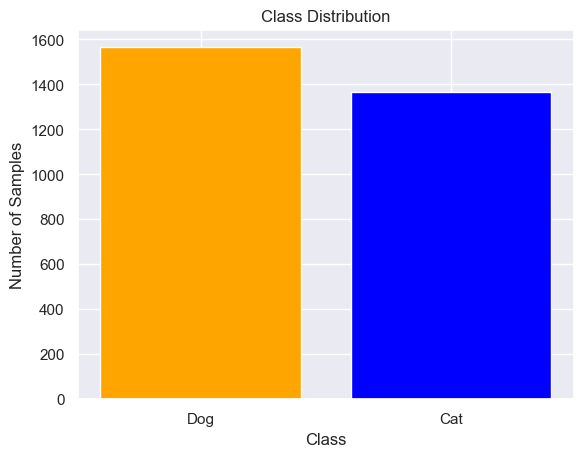

In [11]:
plt.bar(class_names, counts, color=['orange', 'blue'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')


In [12]:
# visualize some samples
samples_count = 3

samples = random.sample(glob.glob(os.path.join(annotations_path,"*.txt")),
                        samples_count)

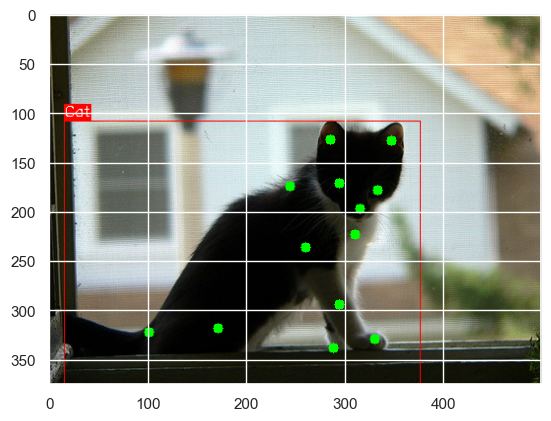

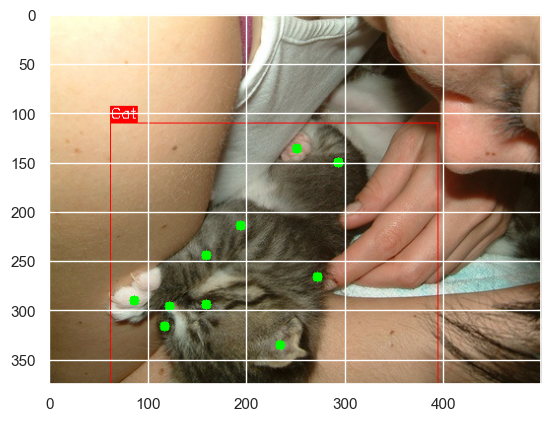

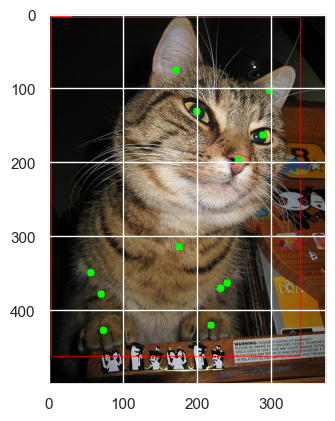

In [13]:
for sample in samples:
    plt.imshow(draw_annotation(sample,classes=class_names))
    plt.show()

In [14]:

# split to train and validation
output_folder = os.path.join(os.getcwd(),'..', 'datasets','animal-pose-yolo-dataset')
split_yolo_dataset(dest_path,
                   output_folder=output_folder,
                   seed=SEED, 
                   train_ratio=0.8)

Train generation:   0%|          | 0/2143 [00:00<?, ?it/s]

Val generation: 100%|██████████| 536/536 [00:01<00:00, 453.58it/s]


YAML config for dataset was created manually, path, classes, flip_idxes were specified